# Week 4 : Introduction to ML Concepts

**Disclaimer:** In this notebook, we have packed all of CS 189 into 1 hour of content. jk.

In [106]:
import PIL
from PIL import Image, ImageChops, ImageFilter
from PIL import ImageDraw
import numpy as np
import os
import sys
import re
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns
from datetime import datetime
import face_recognition

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn import ensemble
from sklearn.svm import SVC 

## What is Machine Learning?

“Machine Learning at its most basic is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world.” – Nvidia 

“Machine learning algorithms can figure out how to perform important tasks by generalizing from examples.” – University of Washington

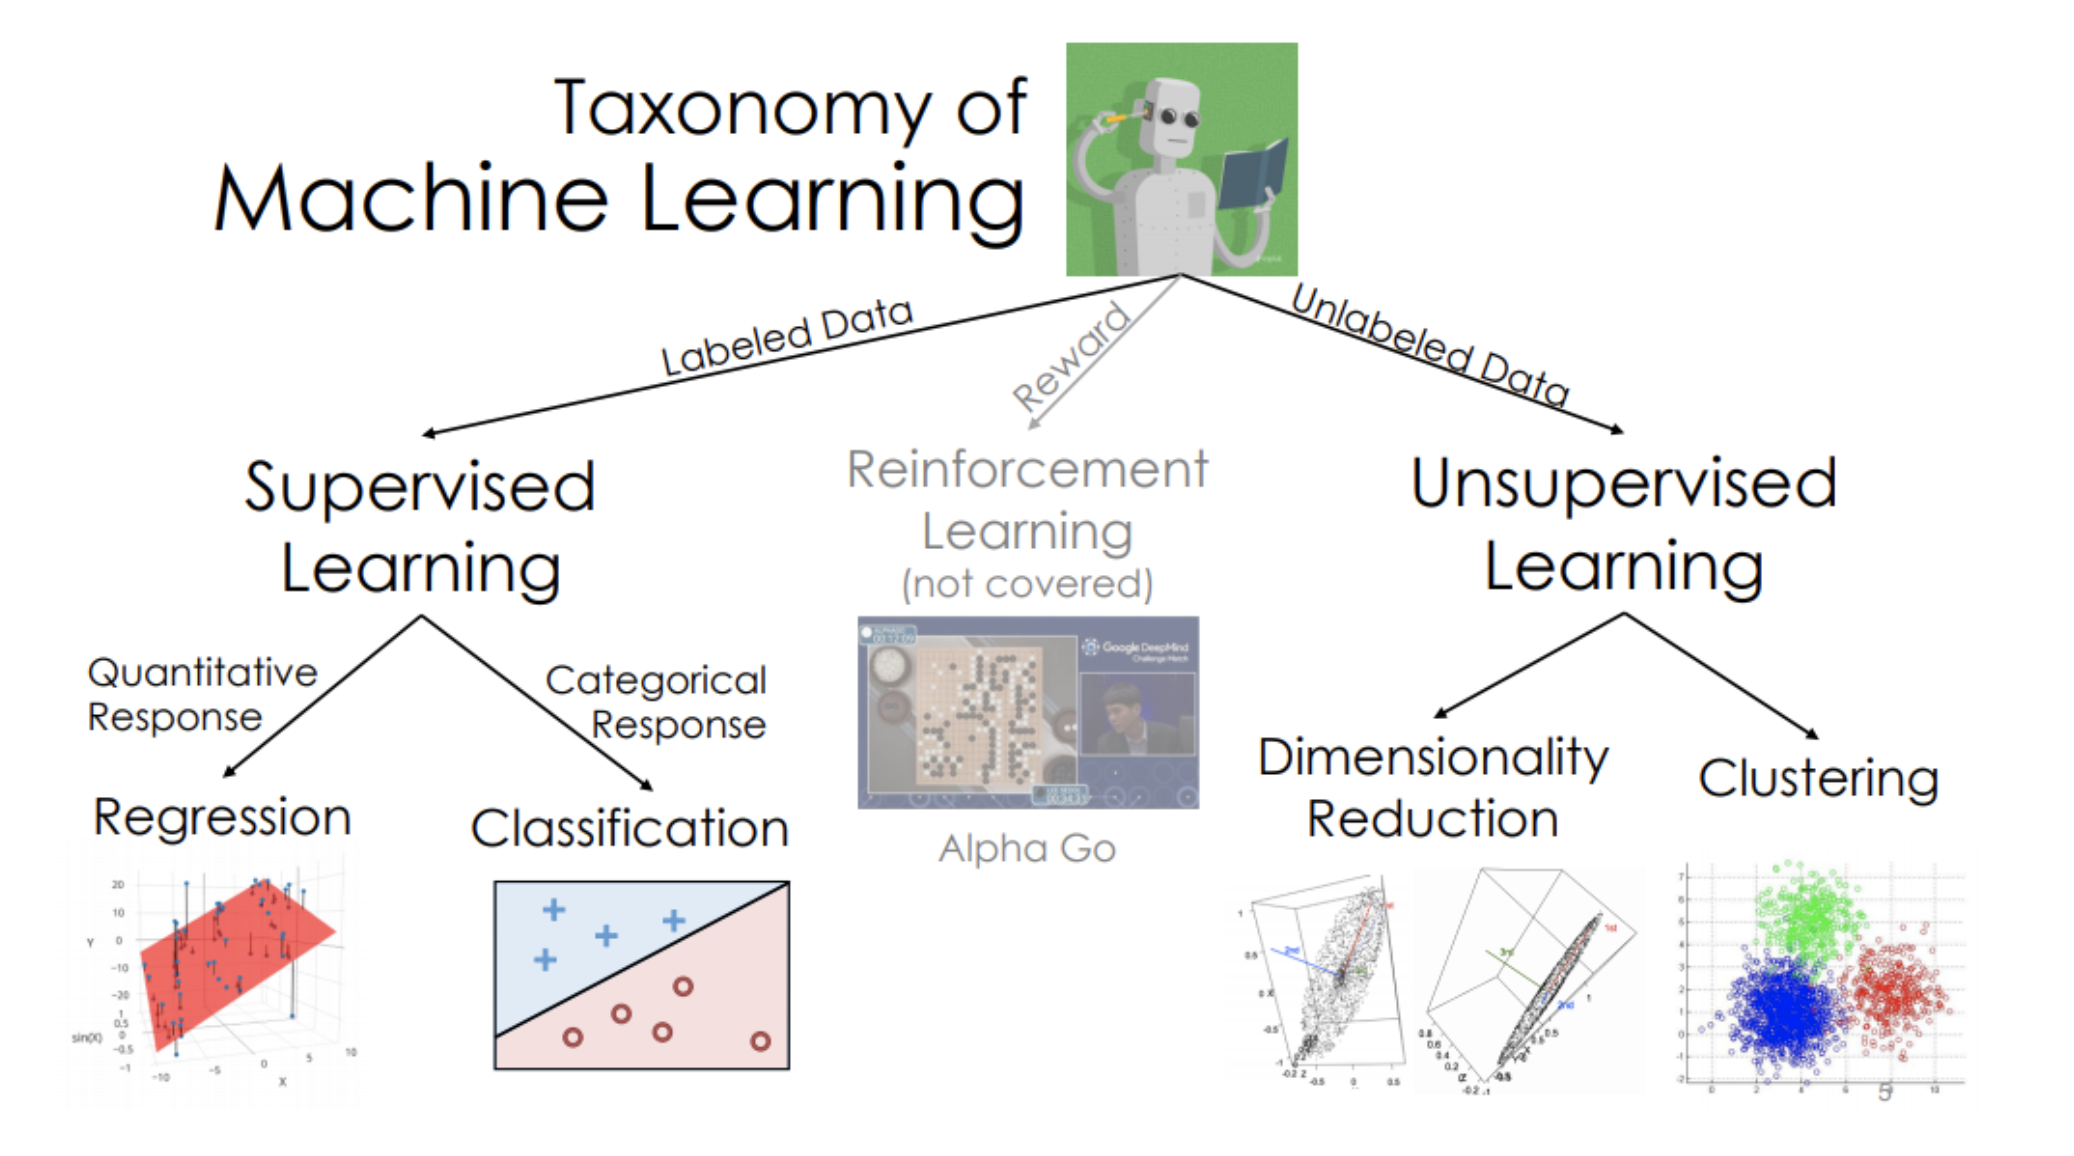

In [10]:
Image.open('taxonomy.jpg')

**Facial Recognition falls under the umbrella of Supervised Learning in one of two ways. First, faces can be interpreted as labeled data of face locations (ex: coordinates of nose and mouth). Additionally, facial recognition is performed with a labeled set of training images. For example, identifying pictures of Obama from Week 2 required the face_recognition function to have access to labeled pictures of Obama beforehand.**

## Introduction to Supervised Learning (Training and Testing)

Join me on a journey back to seventh grade math !

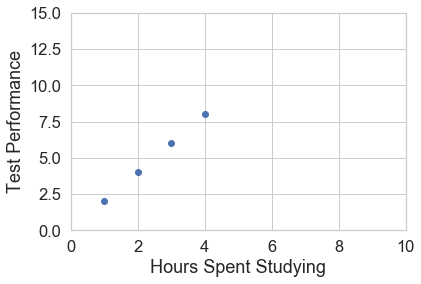

In [68]:
## Sample Data
X = [1,2,3,4]

Y = [2,4,6,8]

plt.scatter(X, Y)
plt.xlim(0,10)
plt.ylim(0,15)
plt.xlabel('Hours Spent Studying')
plt.ylabel('Test Performance')
plt.show()

Givem this data, devise a model to predict Test Performance based on Hours Spent Stuyding.

In [69]:
## Use this graph function
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    X = [1,2,3,4]
    Y = [2,4,6,8]
    plt.plot(x, y, color = 'red')  
    plt.scatter(X, Y)
    plt.xlabel('Hours Spent Studying')
    plt.ylabel('Test Performance')
    plt.show()



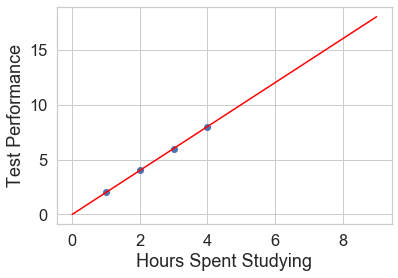

In [70]:
graph('2*x', range(10))

According to our model, what is the expected test performance for 8 hours studying?

In [6]:
formula = '2*x'
x = 8
y = eval(formula)
print(y)

16


**The first part of this experiment where we devised a model based on known X and Y values is referred to as "training". Thse labeled points are used by the model to develop a relationship between X and Y. The second part of this experiment where we predicted test performance for an unkown X datapoint is referred to as "testing". Our model is able to make infrences about an unknown range of data once it has been trained with what is called the "training set". The uknown point (8), is called the testing set. This is the process of linear regression in supervised learning.**

## Example of Regression

Pandas User Guide : https://pandas.pydata.org/docs/user_guide/index.html#user-guide

SkLearn User Guide : https://scikit-learn.org/stable/user_guide.html

In [7]:
data = datasets.load_boston()
Y = data.target
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = Y
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [8]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**In our last example, predicting Test Scores was only on  Study Time (a simple y = mx + b scenario). Here is an example of where multiple linear regression is necessary. We intend to predict House Price (Y) as a function of some combination of these X variables from the list above. How do we know which ones to pick? The simple answer is trial and error.**


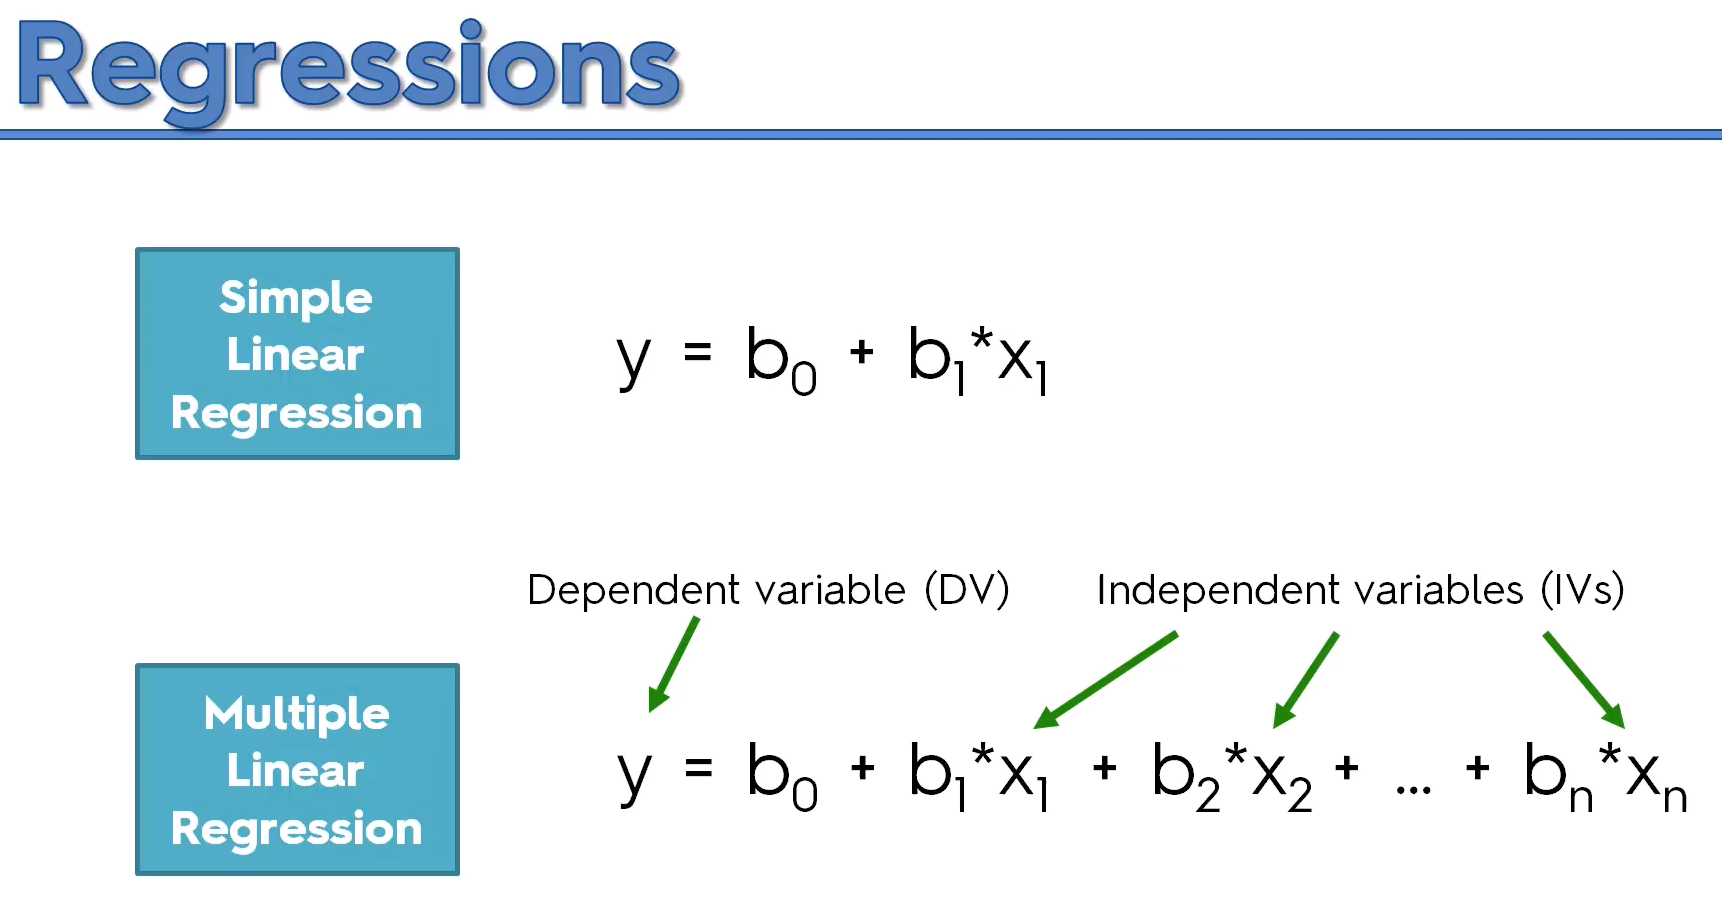

In [68]:
Image.open('regression.png')

**Before we start picking our X variables, we need a way to check how good our predictions are once we make them. Last time we trained our model on three data points and tested our predictions on one new point.**

**As you may see, “making up” new points in this dataset is easier said than done given a relatively large number of columns. In order to simplify that process, we will split some of this data into a testing set and prevent our model from seeing this data until it's time to make predictions. Once we make these predictions we can determine their accuracy in the following manner :**


**RMSE Loss Function**

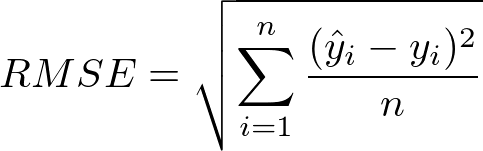

In [13]:
Image.open('rmse.png')

In [14]:
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X)) ** 2))

In [21]:
train, test = train_test_split(df, test_size = 0.20)

**Exercise: Select the best columns that you think would help predict the price.**

In [42]:
## modify the selected_columns list
selected_columns = ['CRIM', 'INDUS', 'AGE', 'PTRATIO']
## modify the column above
x_train, y_train = train[selected_columns], np.asarray(train['Price'])
x_test, y_test = test[selected_columns], np.asarray(test['Price'])

linear_model = LinearRegression().fit(x_train, y_train)

print('Train RMSE:', rmse_score(linear_model, x_train, y_train))
print('Test RMSE:', rmse_score(linear_model, x_test, y_test))




Train RMSE: 7.24119740710084
Test RMSE: 7.132692559082215


**Goal of ML: Minimize the errors in the test (new) data. Having too many columns may overfit the model and lead to a low train error but have a high test error. As data scientists, we must find the optimal amount of information to use when training an ML model**

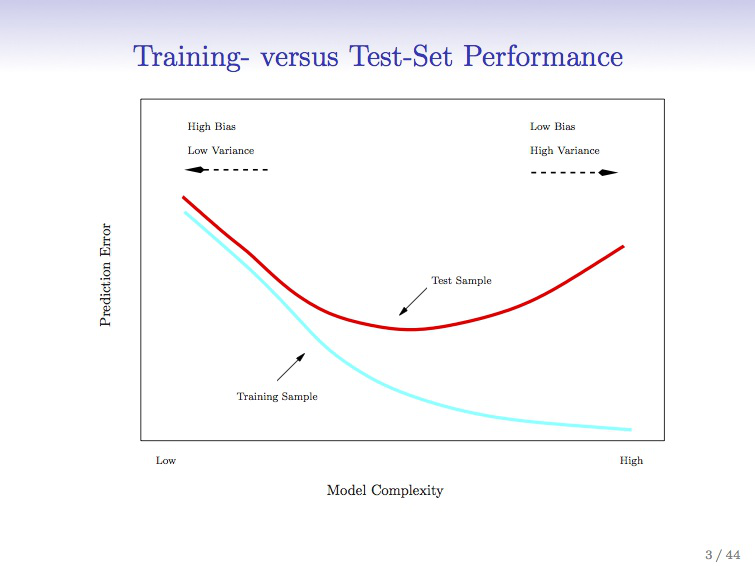

In [44]:
Image.open('overfitting.jpg')

# Introduction to Classification Part 1 - Tools of Classification

Regression and classification are categorized under the same umbrella of supervised machine learning. Both share the same concept of utilizing known datasets (referred to as training datasets) to make predictions.

The main difference between them is that the output variable in **regression is numerical (or continuous) while that for classification is categorical (or discrete).**

We seek to answer the question, to what class does something belong. In the context of facial recognition, we ask, **who's name does a face belong to ?**

## Logistic Regression

Logistic regression takes advantage of a function called the **sigmoid function** in order to trasform the real space from -infinity to + infinity into the probability region of [0,1].

It can help us answer the question, **does an item belong to class 0 or class 1, and if so, with what probability?**

Once multiple instances of simple binary logisitic regression are combined, we can perform multi-class classification by slecting one class while holding the others constant, which lets us stay in the [0,1] probability space.

The sigmoid function governing logistic regression is defined as follows:
$$\sigma(x) =\frac{1}{1 + e^{-x}}$$
The loss function for Logistic Regression Model is called the log-loss function and differs from the linear regression RMSE score.

When this sigmoid function is applied to the linear regression model, we get the following behaviour:

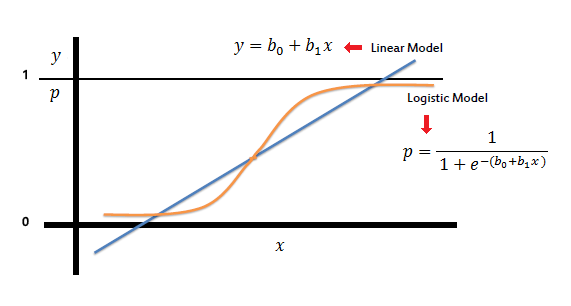

In [45]:
Image.open('logistic_reg.png')

## Decision Tree Classifiers

Decision trees are extremely powerful tools when **decision boundaries between two classes are non-linear.** Due to the nature of the direct one-to-one mapping between the linear model and the sigmoid function, logistic regression works best with linearly separable decision boundaries.

Decision trees can produce non-linear decision boundaries by learning from data to approximate sine curves with a set of if-then-else decision rules. The deeper this tree gets, the more complex these rules become, and the more complex the classification regions become. 

There are two major types of nodes in decision trees:

**1) Decision Node - Decision Nodes have two are more branches based on        the question they ask to split the data.**

**2) Leaf Node - Leaf Nodes represent the classification decisions of          their corresponding parent decision nodes.**

The loss function for decision trees are based on a concept called cross-entropy.

Here is an example of a decision tree classification process:

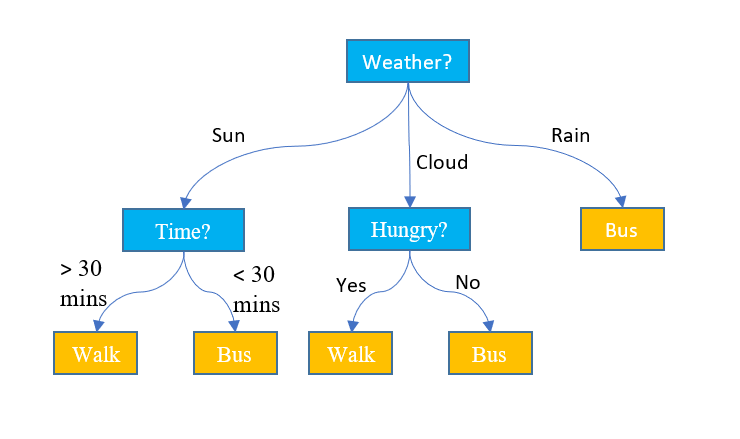

In [46]:
Image.open('decision_tree.png')

## Random Forests

Random Forests are **extensions of decision trees** designed to improve accuracy by harnessing randomness when selecting decision boundaries. 

Introducing randomness helps **identify the most important feature through majority vote** when splitting decision nodes amongst a random set of features. 

Although random forest models take longer to train, they are almost always more accurate than singular decision trees. Their loss function is also rooted in cross entropy.

Here is an example of a random forest model:

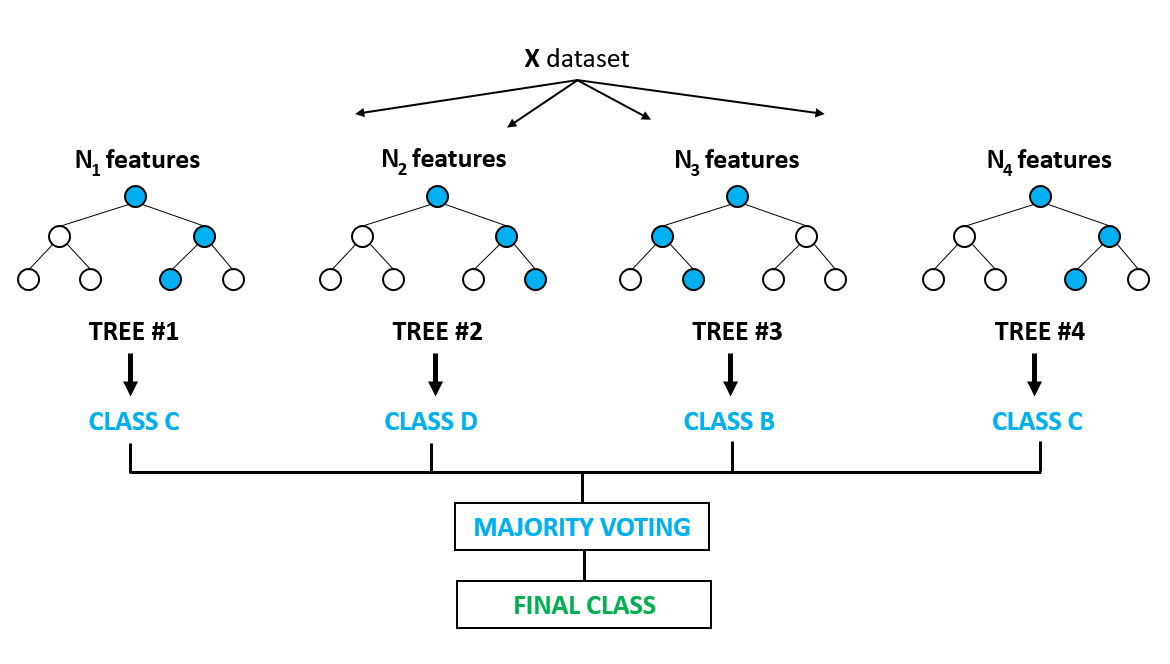

In [47]:
Image.open('random_forest.png')

## Support Vector Machines

Support Vector Machine (SVM) classifiers are applicable for both linear and non-linear problems by **creating hyperplanes that separate data into corresponding classes.**

In most classification problems, there are more than one decision boundary that completely sparate two classes of data. When multiple candidates are in play, the SVM model selects the best one in the following manner:

- **The algorithm finds the points closet to the separation boundary from both classes. These are called support vectors, and the sum of their distnaces is called the margin.**


- **The SVM algorithm then selects the optimal decision boundary by selecting the one with the widest separation between two classes through mazimizing the margin.**


- **When the data is not linearly separable in their corresponding dimensions, the data is converted to a linearly separable format in a higher dimension.**

The loss function for SVMs is extremely similar to the loss function for Logistic Regression.

Below is an example of SVM operating on linearly separable data.


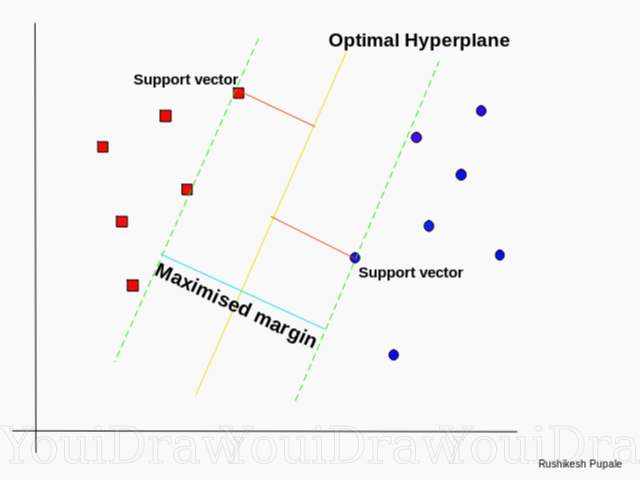

In [49]:
print('Below is an example of SVM operating on linearly separable data.')
Image.open('svm_linear.png')

Below is an example of SVM operating on nonlinear data.
Notice the transformation from 2-D to 3-D


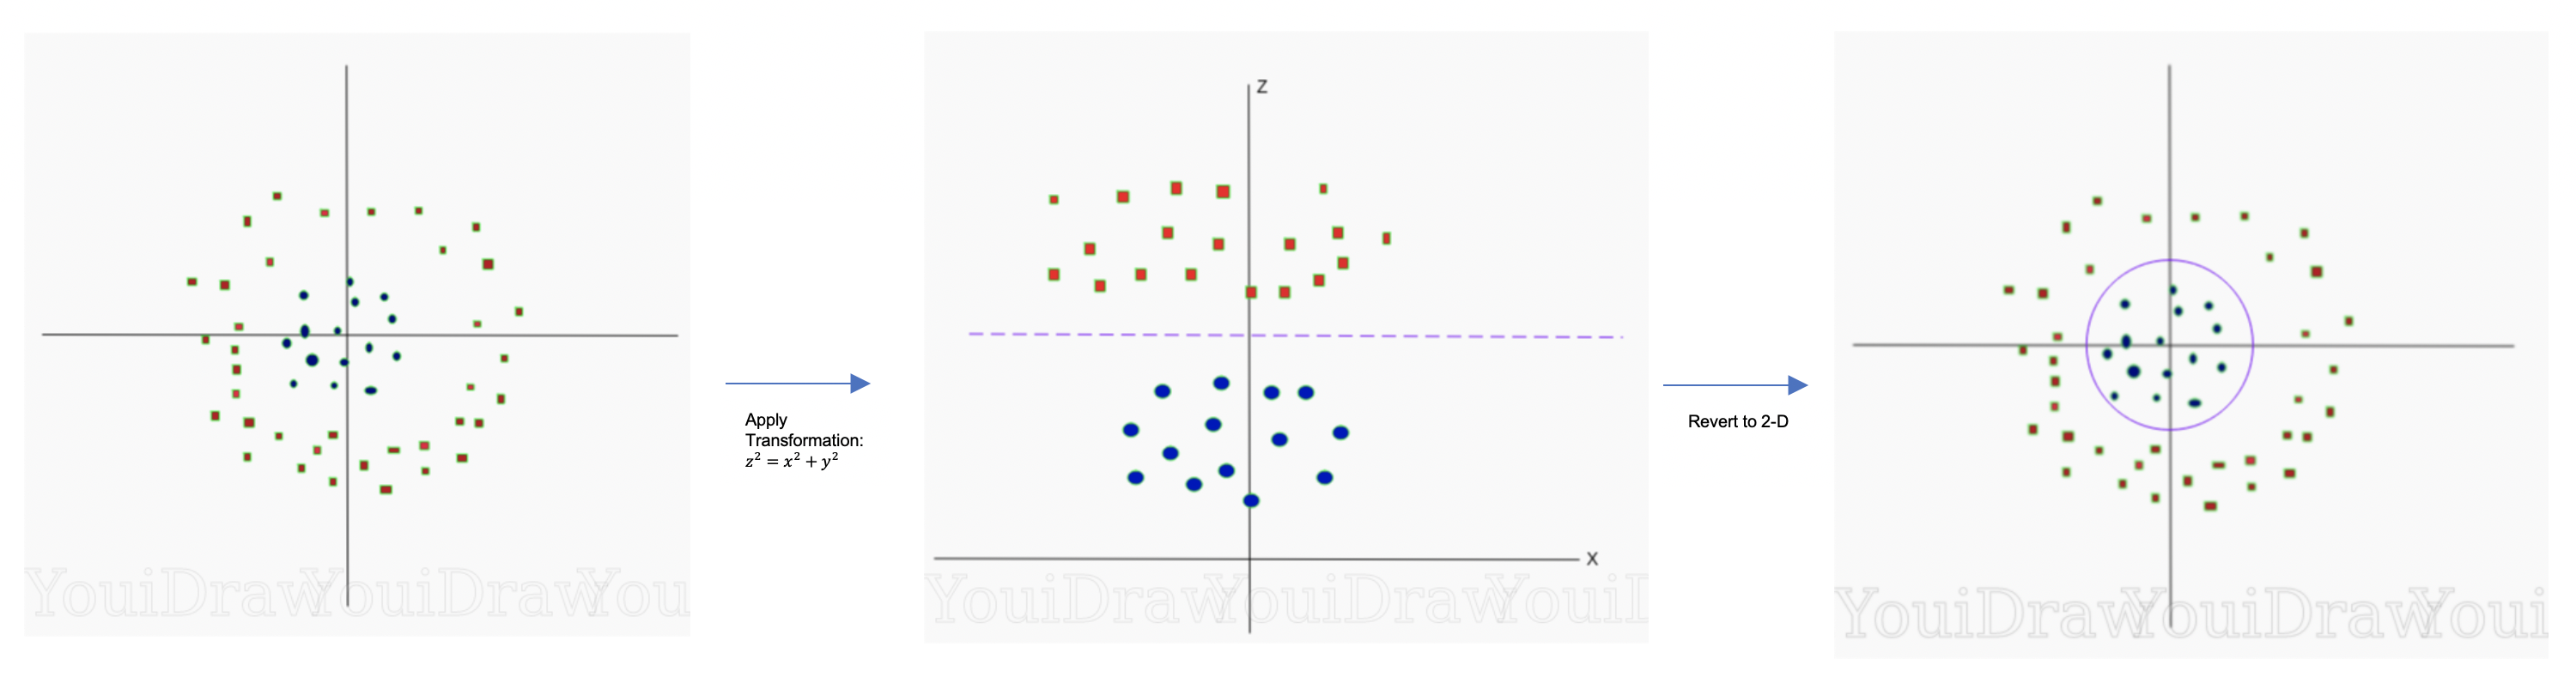

In [52]:
print('Below is an example of SVM operating on nonlinear data.')
print('Notice the transformation from 2-D to 3-D')
Image.open('svm_circle.png')

# Introduction to Classification Part 2 - Applications of Classification

In this section we will be dealing with NBA data from the 2018-19 season where we will attempt to predict a player's position based on their NBA statistics. 

Similarly, we can also attempt to predict someone's name given vectorized data of their face. This is how classification tools are used to implement facial recognition systems.

We are using the NBA data in this example to better visualize the class decisions taken by these classifiers. Often times, vectorized data is extremely difficult to conceptualize in 2-D. 

Lets start by applying our Pandas tools to prepare the dataset for ML training similar to the regression example.

In [60]:
nba_data = pd.read_csv("nba18-19.csv")
nba_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


We notice that there are a lot of positions. In order to simplify the classification and visualizations, we will modify the data to place all players into three overarching classes: **forward, center, and guard.** We will also look at players that have averaged > 10 points to prevent noise.

In [61]:
print(nba_data['Pos'].value_counts())

SG       176
PF       147
PG       139
C        120
SF       118
SF-SG      2
PF-SF      2
SG-SF      1
SG-PF      1
PF-C       1
C-PF       1
Name: Pos, dtype: int64


In [65]:
def basic_position(pos):
    if 'F' in pos:
        return 'F'
    elif 'G' in pos:
        return 'G'
    return 'C'

nba_data['Pos3'] = nba_data['Pos'].apply(basic_position)
nba_data = nba_data[nba_data['PTS'] > 10]
nba_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos3
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,...,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,C
7,8,LaMarcus Aldridge\aldrila01,C,33,SAS,81,81,33.2,8.4,16.3,...,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,C
10,11,Jarrett Allen\allenja01,C,20,BRK,80,80,26.2,4.2,7.1,...,2.4,6.0,8.4,1.4,0.5,1.5,1.3,2.3,10.9,C
19,18,Giannis Antetokounmpo\antetgi01,PF,24,MIL,72,72,32.8,10.0,17.3,...,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,F
21,20,Carmelo Anthony\anthoca01,PF,34,HOU,10,2,29.4,4.9,12.1,...,0.9,4.5,5.4,0.5,0.4,0.7,0.8,3.2,13.4,F


**We will be classifying players into their appropriate position categories based on assists and rebounds**

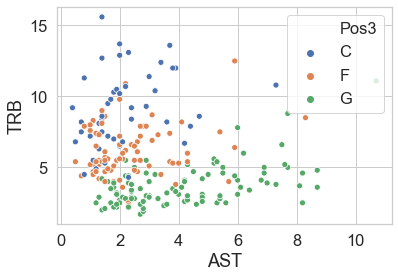

In [71]:
sns.scatterplot(data = nba_data, x = 'AST', y = 'TRB', hue = 'Pos3')
plt.show()

**Creating a Train/Test Split**

In [108]:
## Constructing a Train/Test Split
nba_train, nba_test = train_test_split(nba_data, test_size=0.25, random_state=100)
nba_train = nba_train.sort_values(by='Pos')
nba_test = nba_test.sort_values(by='Pos')

## Visualization Function
def visualize(model, data_type):
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])
    xx, yy = np.meshgrid(np.arange(0, 12, 0.02), np.arange(0, 16, 0.02))
    Z_string = model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse = True)
    Z_int = Z_int.reshape(xx.shape)
    plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
    sns.scatterplot(data = data_type, x = 'AST', y = 'TRB', hue = 'Pos3')
    
    
## storing test_errors to pick best overall model

test_errors = {}

## Logistic Regression - One vs Rest Multi-Class Regression

Logistic Regression Training Accuracy 0.7964071856287425
Logistic Regression Testing Accuracy 0.6428571428571429


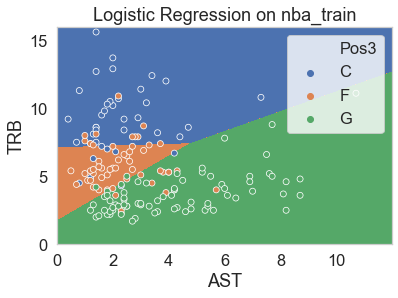

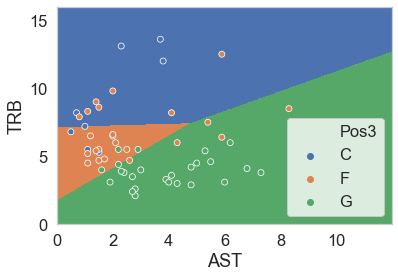

Notice how all the decision boundaries are linear. This is due to the nature of the sigmoid mapping.


In [109]:
## Training the Model
logistic_regression_model = LogisticRegression(multi_class = 'ovr')
logistic_regression_model.fit(nba_train[['AST', 'TRB']], nba_train['Pos3'])

## observing accuracies
lr_training_accuracy = logistic_regression_model.score(nba_train[['AST', 'TRB']], nba_train['Pos3'])
print('Logistic Regression Training Accuracy' , lr_training_accuracy)
lr_test_accuracy = logistic_regression_model.score(nba_test[['AST', 'TRB']], nba_test['Pos3'])
print('Logistic Regression Testing Accuracy', lr_test_accuracy)
test_errors.update({lr_test_accuracy : logistic_regression_model})
## visualizations
visualize(logistic_regression_model, nba_train)
plt.title('Logistic Regression on nba_train')
plt.show()

visualize(logistic_regression_model, nba_test)
plt.show()

print('Notice how all the decision boundaries are linear. This is due to the nature of the sigmoid mapping.')

## Decision Tree Classification

Decision Tree Training Accuracy: 0.9940119760479041
Decision Tree Testing Accuracy: 0.6428571428571429


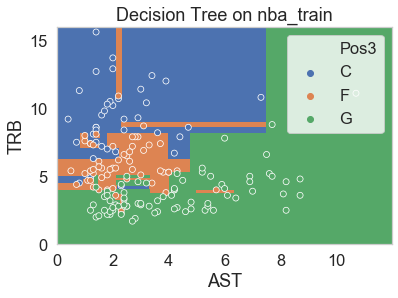

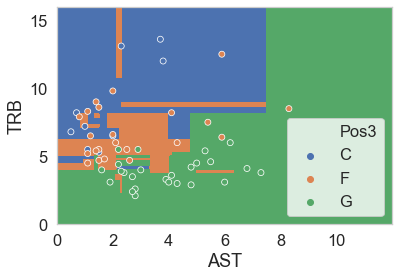

In [110]:
## Training the Model
decision_tree_model = tree.DecisionTreeClassifier(random_state = 42)
decision_tree_model.fit(nba_train[['AST', 'TRB']], nba_train['Pos3'])

## observing accuracies
dt_training_accuracy = decision_tree_model.score(nba_train[['AST', 'TRB']], nba_train['Pos3'])
print('Decision Tree Training Accuracy:', dt_training_accuracy)
dt_test_accuracy = decision_tree_model.score(nba_test[['AST', 'TRB']], nba_test['Pos3'])
print('Decision Tree Testing Accuracy:', dt_test_accuracy)
test_errors.update({dt_test_accuracy : decision_tree_model})
## visualizations
visualize(decision_tree_model, nba_train)
plt.title('Decision Tree on nba_train');
plt.show()

visualize(decision_tree_model, nba_test)
plt.show()

## Random Forest Classification

Random Forest Training Accuracy: 0.9760479041916168
Random Forest Testing Accuracy: 0.7142857142857143


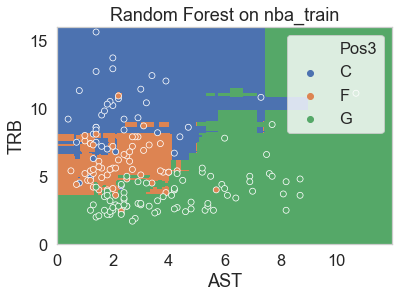

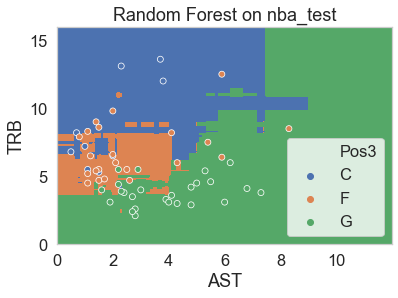

In [111]:
## training the model
random_forest_model = ensemble.RandomForestClassifier(n_estimators = 20, random_state = 42)
random_forest_model.fit(nba_train[['AST', 'TRB']], nba_train['Pos3'])

## observing accuracies
rf_train_accuracy = random_forest_model.score(nba_train[['AST', 'TRB']], nba_train['Pos3'])
print('Random Forest Training Accuracy:', rf_train_accuracy)
rf_test_accuracy = random_forest_model.score(nba_test[['AST', 'TRB']], nba_test['Pos3'])
print('Random Forest Testing Accuracy:', rf_test_accuracy)
test_errors.update({rf_test_accuracy : random_forest_model})

## visualizations
visualize(random_forest_model, nba_train)
plt.title('Random Forest on nba_train');
plt.show()

visualize(random_forest_model, nba_test)
plt.title('Random Forest on nba_test');
plt.show()

## Support Vector Machine Classification

Support Vector Machine Training Accuracy: 0.7964071856287425
Random Forest Testing Accuracy: 0.7321428571428571


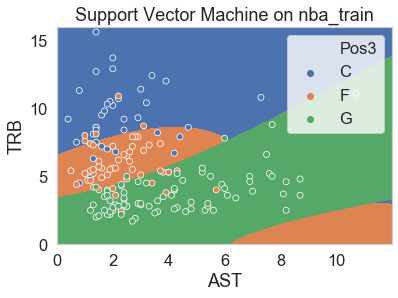

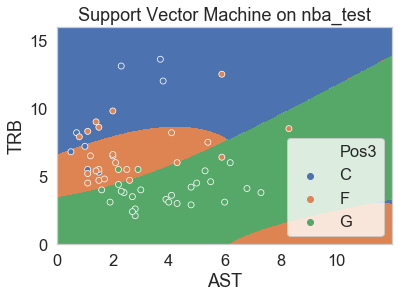

In [119]:
## training the model

## experiment with different kernels
# Choices : ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
svm_model = SVC(kernel = 'poly', random_state = 42)
svm_model.fit(nba_train[['AST', 'TRB']], nba_train['Pos3'])

## observing accuracies
svm_train_accuracy = svm_model.score(nba_train[['AST', 'TRB']], nba_train['Pos3'])
print('Support Vector Machine Training Accuracy:', svm_train_accuracy)
svm_test_accuracy = svm_model.score(nba_test[['AST', 'TRB']], nba_test['Pos3'])
print('Random Forest Testing Accuracy:', svm_test_accuracy)
test_errors.update({svm_test_accuracy : svm_model})

## visualizations
visualize(svm_model, nba_train)
plt.title('Support Vector Machine on nba_train');
plt.show()

visualize(svm_model, nba_test)
plt.title('Support Vector Machine on nba_test');
plt.show()


## Selecting the Best Model

In [120]:
## let's take a look at our test_errors dictionary and pick the best model 
test_errors

{0.6428571428571429: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 0.7142857142857143: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=20,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  

In [123]:
best_model_error = max(test_errors)
best_model = test_errors[best_model_error]
print('The best model for this dataset is', best_model)
print('The best model has an accuracy score of', round(best_model_error *100, 2), 'percent')

The best model for this dataset is SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
The best model has an accuracy score of 73.21 percent
